In [1]:
import pandas as pd
import time
from datetime import datetime, timedelta

In [2]:
df=pd.read_excel("data_dump.xlsx")

In [3]:
df.head()

,purchase-date,asin,ship-state,item-price
0,2019-02-02 06:02:27,B0B1DYTPXB,RAJASTHAN,449.0
1,2019-02-03 06:02:27,B09JSTF9LS,ANDHRA PRADESH,360.0
2,2019-02-04 06:02:27,B0B1DYTPXB,RAJASTHAN,NaN
3,2019-02-05 06:02:27,B08SJX7YCT,KARNATAKA,456.0
4,2019-02-06 06:02:27,B09BQJ4JGZ,MAHARASHTRA,199.0


In [5]:
ist=df['purchase-date'].dt.tz_localize('UTC').dt.tz_convert('Asia/Kolkata').dt.strftime('%Y-%m-%d %H:%M:%S')


In [6]:
df=pd.concat([df,ist],axis=1)

In [7]:
df.head()

,purchase-date,asin,ship-state,item-price,purchase-date
0,2019-02-02 06:02:27,B0B1DYTPXB,RAJASTHAN,449.0,2019-02-02 11:32:27
1,2019-02-03 06:02:27,B09JSTF9LS,ANDHRA PRADESH,360.0,2019-02-03 11:32:27
2,2019-02-04 06:02:27,B0B1DYTPXB,RAJASTHAN,NaN,2019-02-04 11:32:27
3,2019-02-05 06:02:27,B08SJX7YCT,KARNATAKA,456.0,2019-02-05 11:32:27
4,2019-02-06 06:02:27,B09BQJ4JGZ,MAHARASHTRA,199.0,2019-02-06 11:32:27


In [8]:
df = df.iloc[: , 1:]

In [9]:
df.head()

,asin,ship-state,item-price,purchase-date
0,B0B1DYTPXB,RAJASTHAN,449.0,2019-02-02 11:32:27
1,B09JSTF9LS,ANDHRA PRADESH,360.0,2019-02-03 11:32:27
2,B0B1DYTPXB,RAJASTHAN,NaN,2019-02-04 11:32:27
3,B08SJX7YCT,KARNATAKA,456.0,2019-02-05 11:32:27
4,B09BQJ4JGZ,MAHARASHTRA,199.0,2019-02-06 11:32:27


In [10]:
df['Dates'] = pd.to_datetime(df['purchase-date']).dt.date
df['Time'] = pd.to_datetime(df['purchase-date']).dt.time

In [11]:
df.head()

,asin,ship-state,item-price,purchase-date,Dates,Time
0,B0B1DYTPXB,RAJASTHAN,449.0,2019-02-02 11:32:27,2019-02-02,11:32:27
1,B09JSTF9LS,ANDHRA PRADESH,360.0,2019-02-03 11:32:27,2019-02-03,11:32:27
2,B0B1DYTPXB,RAJASTHAN,NaN,2019-02-04 11:32:27,2019-02-04,11:32:27
3,B08SJX7YCT,KARNATAKA,456.0,2019-02-05 11:32:27,2019-02-05,11:32:27
4,B09BQJ4JGZ,MAHARASHTRA,199.0,2019-02-06 11:32:27,2019-02-06,11:32:27


In [12]:
df=df.drop(["purchase-date"],axis=1)

In [13]:
df.head()

,asin,ship-state,item-price,Dates,Time
0,B0B1DYTPXB,RAJASTHAN,449.0,2019-02-02,11:32:27
1,B09JSTF9LS,ANDHRA PRADESH,360.0,2019-02-03,11:32:27
2,B0B1DYTPXB,RAJASTHAN,NaN,2019-02-04,11:32:27
3,B08SJX7YCT,KARNATAKA,456.0,2019-02-05,11:32:27
4,B09BQJ4JGZ,MAHARASHTRA,199.0,2019-02-06,11:32:27


In [14]:
df['Time'].value_counts()

11:32:27    1258
Name: Time, dtype: int64

In [15]:
df.shape

(1258, 5)

In [ ]:
## the entire time column lies in 00:00:00 - 16:00:00,hence only bucket 2 is '1' and remaining buckets will be '0'

In [16]:
df['bucket1']=0
df['bucket2']=1
df['bucket3']=0


In [17]:
df.head()

,asin,ship-state,item-price,Dates,Time,bucket1,bucket2,bucket3
0,B0B1DYTPXB,RAJASTHAN,449.0,2019-02-02,11:32:27,0,1,0
1,B09JSTF9LS,ANDHRA PRADESH,360.0,2019-02-03,11:32:27,0,1,0
2,B0B1DYTPXB,RAJASTHAN,NaN,2019-02-04,11:32:27,0,1,0
3,B08SJX7YCT,KARNATAKA,456.0,2019-02-05,11:32:27,0,1,0
4,B09BQJ4JGZ,MAHARASHTRA,199.0,2019-02-06,11:32:27,0,1,0


In [18]:
df['asin'].value_counts()

B0B1DYTPXB    458
B08SJX7YCT    292
B09JSTF9LS    259
B09BQJ4JGZ    153
B099ZNHSJ5     30
B0B3DSR9C6     26
B09BQLLHHC     14
B09BQLPGNM     12
B099ZQYB5V      8
B09BQGRGS6      3
B0B1VKK1ZL      2
B09BQL7K6M      1
Name: asin, dtype: int64

In [19]:
df['ship-state'].value_counts()

KARNATAKA            207
UTTAR PRADESH        135
DELHI                131
MAHARASHTRA          117
TAMIL NADU            78
TELANGANA             77
RAJASTHAN             50
KERALA                47
UTTARAKHAND           43
HARYANA               43
WEST BENGAL           38
BIHAR                 38
GUJARAT               29
ANDHRA PRADESH        28
MADHYA PRADESH        19
PUNJAB                17
ODISHA                17
GOA                   15
ASSAM                 12
Karnataka             10
NAGALAND               9
JHARKHAND              9
Maharashtra            8
JAMMU & KASHMIR        6
Uttar Pradesh          5
MANIPUR                5
CHHATTISGARH           5
CHANDIGARH             5
Tamilnadu              4
tamil Nadu             4
KA                     3
ARUNACHAL PRADESH      3
SIKKIM                 3
HIMACHAL PRADESH       3
MIZORAM                3
MEGHALAYA              3
Punjab                 2
Rajasthan              2
Mizoram                2
Tamil Nadu             2


In [24]:
df['ship-state'].value_counts()[0:5] ## top 5 states where sales are high

KARNATAKA        207
UTTAR PRADESH    135
DELHI            131
MAHARASHTRA      117
TAMIL NADU        78
Name: ship-state, dtype: int64

In [25]:
df['asin'].value_counts()[0:5]  ## top 5 ASIN with high sales

B0B1DYTPXB    458
B08SJX7YCT    292
B09JSTF9LS    259
B09BQJ4JGZ    153
B099ZNHSJ5     30
Name: asin, dtype: int64

In [27]:
from matplotlib import pyplot as plt

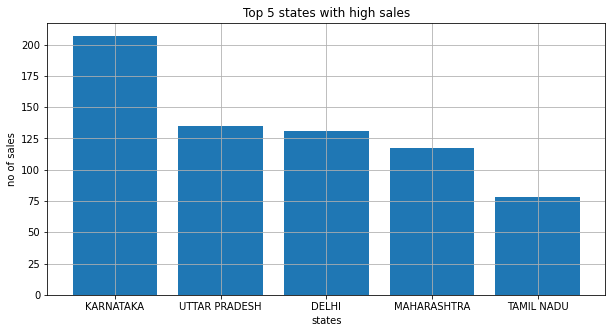

In [31]:
plt.figure(figsize=(10,5))
plt.bar(list(df['ship-state'].value_counts()[0:5].keys()),list(df['ship-state'].value_counts()[0:5]))
plt.title('Top 5 states with high sales')
plt.xlabel('states')
plt.ylabel('no of sales')
plt.grid(True)
plt.show()

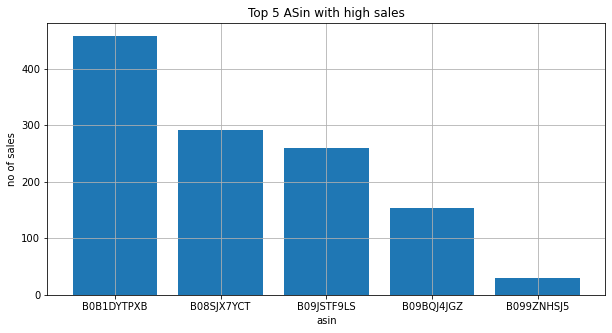

In [32]:
plt.figure(figsize=(10,5))
plt.bar(list(df['asin'].value_counts()[0:5].keys()),list(df['asin'].value_counts()[0:5]))
plt.title('Top 5 ASin with high sales')
plt.xlabel('asin')
plt.ylabel('no of sales')
plt.grid(True)
plt.show()